In [ ]:
# for data wrangling
import numpy as np
import pandas as pd



# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler


# for statistics and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_auc_score


# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree



In [ ]:
rta=pd.read_csv('/content/Road Traffic Accidents Dataset.csv')

In [ ]:
# replacing misspelled vehicle type names

# Lorry
rta.loc[(rta['Type_of_vehicle'] == "Lorry (41?100Q)") |
         (rta['Type_of_vehicle'] == "Lorry (11?40Q)") |
         (rta['Type_of_vehicle'] == "Pick up upto 10Q")
         , 'Type_of_vehicle'] = 'Lorry'

rta.loc[(rta['Type_of_vehicle'] == "Public (12 seats)") |
         (rta['Type_of_vehicle'] == "Public (13?45 seats)") |
         (rta['Type_of_vehicle'] == "Public (> 45 seats)")
         , 'Type_of_vehicle'] = 'Public Vehicles'


rta.loc[rta['Defect_of_vehicle'] == "No defect", 'Defect_of_vehicle'] = '0'

# replacing misspelled Area_accident_occured names

# Rural village areasOffice areas
rta.loc[rta['Area_accident_occured'] == "Rural village areasOffice areas", 'Area_accident_occured'] = 'Rural village areas or Office areas'


rta['Area_accident_occured'] = rta['Area_accident_occured'].str.strip()

#to_remove 5 in age band of casuality
rta=rta.drop(rta.index[rta['Age_band_of_casualty']=='5'])

rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)



rta.loc[rta['Age_band_of_driver'] == "Unknown", 'Age_band_of_driver'] = '18-30'
rta.loc[rta['Sex_of_driver'] == "Unknown", 'Sex_of_driver'] = 'Male'
rta.loc[rta['Driving_experience'] == "unknown", 'Driving_experience'] = '5-10yr'
rta.loc[rta['Service_year_of_vehicle'] == "Unknown", 'Service_year_of_vehicle'] = '2-5yrs'
rta.loc[rta['Types_of_Junction'] == "Unknown", 'Types_of_Junction'] = 'Y Shape'
rta.loc[rta['Lanes_or_Medians'] == "Unknown", 'Lanes_or_Medians'] = 'Two-way (divided with broken lines road marking)'
rta.loc[rta['Weather_conditions'] == "Unknown", 'Weather_conditions'] = 'Normal'
rta.loc[rta['Type_of_collision'] == "Unknown", 'Type_of_collision'] = 'Vehicle with vehicle collision'
rta.loc[rta['Vehicle_movement'] == "Unknown", 'Vehicle_movement'] = 'Going straight'
rta.loc[rta['Cause_of_accident'] == "Unknown", 'Cause_of_accident'] = 'No distancing'
rta.loc[rta['Vehicle_driver_relation'] == "Unknown", 'Vehicle_driver_relation'] = 'Employee'
rta.loc[rta['Work_of_casuality'] == "Unknown", 'Work_of_casuality'] = 'Driver'
rta.loc[rta['Area_accident_occured'] == "Unknown", 'Area_accident_occured'] = 'Other'
rta.loc[rta['Educational_level'] == "Unknown", 'Educational_level'] = 'Junior high school'


rta.loc[rta['Casualty_class'] == "na", 'Casualty_class'] = 'Driver or rider'
rta.loc[rta['Casualty_severity'] == "na", 'Casualty_severity'] = '3'
rta.loc[rta['Age_band_of_casualty'] == "na", 'Age_band_of_casualty'] = '18-30'
rta.loc[rta['Sex_of_casualty'] == "na", 'Sex_of_casualty'] = 'Male'




rta['Road_surface_type'].fillna(rta['Road_surface_type'].mode()[0],inplace=True)
rta['Road_allignment'].fillna(rta['Road_allignment'].mode()[0], inplace=True)
rta['Type_of_collision'].fillna(rta['Type_of_collision'].mode()[0], inplace=True)
rta['Vehicle_movement'].fillna(rta['Vehicle_movement'].mode()[0], inplace=True)
rta['Lanes_or_Medians'].fillna(rta['Lanes_or_Medians'].mode()[0], inplace=True)
rta['Types_of_Junction'].fillna(rta['Types_of_Junction'].mode()[0], inplace=True)
rta['Educational_level'].fillna(rta['Educational_level'].mode()[0], inplace=True)
rta['Driving_experience'].fillna(rta['Driving_experience'].mode()[0],inplace=True)
rta['Type_of_vehicle'].fillna(rta['Type_of_vehicle'].mode()[0],inplace=True)
rta['Fitness_of_casuality'].fillna(rta['Fitness_of_casuality'].mode()[0],inplace=True)
rta['Defect_of_vehicle'].fillna(rta['Defect_of_vehicle'].mode()[0],inplace=True)
rta['Vehicle_driver_relation'].fillna(rta['Vehicle_driver_relation'].mode()[0],inplace=True)
rta['Owner_of_vehicle'].fillna(rta['Owner_of_vehicle'].mode()[0],inplace=True)
rta['Work_of_casuality'].fillna(rta['Work_of_casuality'].mode()[0],inplace=True)
rta['Area_accident_occured'].fillna(rta['Area_accident_occured'].mode()[0],inplace=True)
rta['Service_year_of_vehicle'].fillna(rta['Service_year_of_vehicle'].mode()[0],inplace=True)
rta['Educational_level'].fillna(rta['Service_year_of_vehicle'].mode()[0],inplace=True)




rta['Sex_of_driver'] = rta['Sex_of_driver'].map({'Female': 0,
                                                 'Male': 1})
rta['Time'] = rta['Time'].map({'Day': 1,
                               'Night': 0})

rta['Age_band_of_driver'] = rta['Age_band_of_driver'].map({'Under 18': 0,
                                                            '18-30': 1,
                                                            '31-50': 2,
                                                            'Over 51': 3})
rta['Driving_experience'] = rta['Driving_experience'].map({'No Licence': 0,
                                                           'Below 1yr': 1,
                                                           '1-2yr': 2,
                                                           '2-5yr': 3,
                                                           '5-10yr': 4,
                                                           'Above 10yr': 5})
rta['Educational_level'] = rta['Educational_level'].map({'Illiterate': 0,
                                                         'Writing & reading': 1,
                                                         'Elementary school': 2,
                                                         'Junior high school': 3,
                                                         'High school': 4,
                                                         'Above high school': 5})

rta['Accident_severity'] = rta['Accident_severity'].map({'Slight Injury': 0,
                                                         'Serious Injury': 1,
                                                         'Fatal injury': 2})
rta['Age_band_of_casualty']=rta['Age_band_of_casualty'].map({'Under 18':0,
                                                             '18-30':1,
                                                             '31-50':2,
                                                             'Over 51':3})


rta['Defect_of_vehicle']=rta['Defect_of_vehicle'].astype('int')
rta['Casualty_severity']=rta['Casualty_severity'].astype('int')


from sklearn.preprocessing import LabelEncoder
cats_cols = rta.columns[rta.dtypes == 'object']
for cats_col in cats_cols:
    le = LabelEncoder()
    rta[cats_col] = le.fit_transform(rta[cats_col])


#Irrelevent columns
#rta.drop('Service_year_of_vehicle', axis=1, inplace=True)
rta.drop('Educational_level', axis=1, inplace=True)
#rta.drop('Owner_of_vehicle', axis=1, inplace=True)
#rta.drop('Area_accident_occured', axis=1, inplace=True)
rta.drop('Work_of_casuality', axis=1, inplace=True)
rta.drop('Sex_of_casualty',axis=1,inplace=True)
rta.drop('Day_of_week',axis=1,inplace=True)
rta.drop('Time',axis=1,inplace=True)


In [ ]:
x = rta.drop(['Accident_severity'],axis=1)
y = rta['Accident_severity']



## K-Fold

In [ ]:
fold = KFold(n_splits = 5)
fold

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:

for train_index,test_index in fold.split([1,2,3,4,5,6,7,8,9,10,11,12]):
    print(train_index,test_index)

[ 3  4  5  6  7  8  9 10 11] [0 1 2]
[ 0  1  2  6  7  8  9 10 11] [3 4 5]
[ 0  1  2  3  4  5  8  9 10 11] [6 7]
[ 0  1  2  3  4  5  6  7 10 11] [8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11]


## StratifiedKFold

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits = 2)
fold

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
logistic_scores = []
rf_scores = []
SVC_scores = []
for train_index,test_index in fold.split(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

    logistic_scores.append(get_score_from_model(LogisticRegression(),xtrain,xtest,ytrain,ytest))
    rf_scores.append(get_score_from_model(RandomForestClassifier(),xtrain,xtest,ytrain,ytest))
    SVC_scores.append(get_score_from_model(SVC(),xtrain,xtest,ytrain,ytest))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print(logistic_scores)
print(rf_scores)
print(SVC_scores)

[0.8488612836438924, 0.8488612836438924]
[0.8488612836438924, 0.8492753623188406]
[0.8488612836438924, 0.8488612836438924]


### Cross _ val _ Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
L_scores = cross_val_score(LogisticRegression(),x,y)
rf_scores = cross_val_score(RandomForestClassifier(),x,y)
svc_scores = cross_val_score(SVC(),x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print(L_scores)
print(rf_scores)
print(svc_scores)

[0.84637681 0.84637681 0.84672742 0.84589892 0.84631317]
[0.84637681 0.84389234 0.84672742 0.85086993 0.84631317]
[0.84637681 0.84637681 0.84672742 0.84631317 0.84631317]


### Gamma

#### The gamma paraeter defines how far the influence of a singlr training example reaches,with low values meaing far and high values meaning close

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
gds = GridSearchCV(svc_model,{
    "gamma" : [5,1,10,20], "C" :[1,5,10,20],

    "kernel" :["linear","rbf","poly"]},cv = 5,return_train_score = True)

In [ ]:
#gds.fit(xtrain,ytrain)
#gds.cv_results_
#data = pd.DataFrame(gds.cv_results_)
#data

In [ ]:
#print(gds)

In [ ]:
#gds.best_params_     #find the best Parameter

### Find Best Models with different hyperparameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params = {
    "svm" : {"model" : svm.SVC(gamma = "auto"), "params" : {"C" : [1,10,20], "kernel" : ["linear","rbf"]}},
    "random_forest" : {"model" : RandomForestClassifier(), "params" : {"n_estimators" : [11,5,10]}},
    "logistic_regression" : {"model" : LogisticRegression(), "params" : {"C" : [1,5,10]}}
}

#if "auto" uses 1/n_features.

In [ ]:
scores = []
models = ["svm","random_forest","logistic_regression"]
for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score = True)
    gds.fit(x,y)
    scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
df

,model,best_score,best_params
0,svm,0.846421,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.840458,{'n_estimators': 10}
2,logistic_regression,0.846339,{'C': 1}


In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(xtrain, ytrain)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(xtrain, ytrain)
(gsearch.best_params_, gsearch.best_score_)


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 300},
 0.776901676234537)

In [ ]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(xtrain, ytrain)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(xtrain, ytrain)

final_model = gsearch.best_estimator_
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.7888380613374412)

In [ ]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(xtrain, ytrain)
y_pred_tuned = extree_tuned.predict(xtest)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }


# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [ ]:
bestParams

<function __main__.bestParams(model, param, xtrain, ytrain)>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

acc=modelAccuracy(models,x,y,1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy for  LogisticRegression  is : 0.8525879917184265
The Accuracy for  DecisionTreeClassifier  is : 0.7490683229813665
The Accuracy for  SVM  is : 0.8525879917184265
The Accuracy for  KNeighborsClassifier  is : 0.8405797101449275
The Accuracy for  GNB  is : 0.12298136645962733
The Accuracy for  RandomForestClassifier  is : 0.8538302277432712
The Accuracy for  AdaBoostClassifier  is : 0.8525879917184265
The Accuracy for  GradientBoostingClassifier  is : 0.8575569358178053


In [ ]:
bestModel(acc)

Best Model is  GradientBoostingClassifier  with accuaracy => 0.8575569358178053


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,xtrain,ytrain)

Best Parameters are  {'criterion': 'gini', 'n_estimators': 100}
Best Accuracy is  0.786157214489048


In [ ]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

0.8488612836438924
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.50      0.02      0.04       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.45      0.34      0.32      2415
weighted avg       0.79      0.85      0.78      2415



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


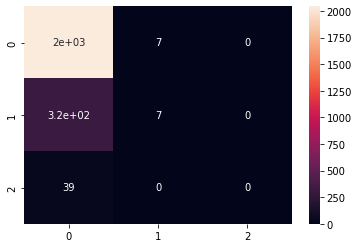

In [ ]:
#Final Evaluation
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84575569 0.84782609 0.84989648 0.84679089 0.84679089 0.84989648
 0.84679089 0.85492228 0.84766839 0.84974093]
Mean: 0.8486079018225897
Standard Deviation: 0.0025300116952735358


In [ ]:
xgboost = XGBClassifier(max_depth=3, learning_rate=0.005, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(xtrain, ytrain)
preds = xgboost.predict(xtest)

accuracy = (preds == ytest).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 84.97


In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84575569 0.84782609 0.84989648 0.84679089 0.84679089 0.84989648
 0.84679089 0.85492228 0.84766839 0.84974093]
Mean: 0.8486079018225897
Standard Deviation: 0.0025300116952735358
